# Advanced programming projects

Below, we give you some ideas for more advanced projects python. These are meant to be an illustration of what one can achieve with programming.

However the best project is what you find useful: if you know a topic you want to learn the most, this course is the best time to get started. Consider something you want to do, formulate it as a project and share with us.

## Organizing your work

In order to make this experience most useful, follow these rules:

- Don't work alone, find yourself a group of people with who you are going to collaborate.
- Plan ahead: don't just start hacking; rather discuss how the project is going to work out, which parts it consists of, and what difficulties you would expect.
- Use git to coordinate your work. For a small project it may seem like an overkill, but consider it a training experience.
- think of how to organize your code so that it is reusable.
- Add tests checking your code (more on this will come later).
- Separate different parts of the project among different participants.
- Read what your collaborators write, try to understand what is happening in that code, and give feedback.

# Projects

## Extract information from text

Make a module to extract information from some text stored in a string. Possible functionality could be:

- count number of words/letters in a text.
- count how many times a word accurs in a text.
- find all occurences of a word in a text, and output the word together with it's surrounding. For example, output 5 words before or after, or the whole sentence.
- Be creative!
- The text can be also provided through a filename, or a URL. Adapt your code to accept different sources of text.
- Can you implement a spellcheck? Can you find libraries that can help you work with natural language?

## Peak finder

Make a module for searching and fitting for resonant peaks in noisy data.

- Your procedure needs to be resistant against noise, think how you are going to find the peaks.
- Implement generating mock signal so that you can test your procedure systematically.
- How would you estimate the error in the fit results?
- Does your procedure work if the points are not measured homogeneously?
- What about finding several peaks (an amount not known in advance)?

[11 48 92] [1.27788097 0.94857717 1.2869482 ]


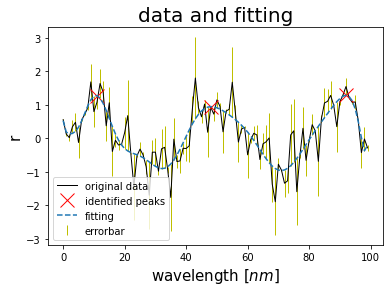

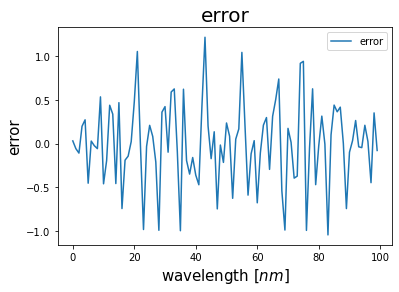

In [1]:

# import necessary libraries
import numpy as np
import pandas as pd
from scipy.signal import find_peaks
import matplotlib.pyplot as plt
import csv


# global variable definition
n=100    # number of sample points
deg1 = 30    # polynomial order for fit
xs=np.linspace(0,1,n)    # spacing for data
x= np.arange(0, n, 1)

# input data generation
def data_f (f):
    return np.random.normal(0, 0.5, n)+np.sin (np.linspace(0, f*np.pi, n))
    """generate a random signal with noise"""
data = data_f(5)

# curve fitting
def curve_fit(d, deg=20):
    """fitting the curve with polynomial function"""
    V=np.polynomial.legendre.legvander(xs,deg)
    coeffs=np.linalg.lstsq(V,d,rcond=None)[0]
    g=np.polynomial.legendre.legval(xs,coeffs)
    
    #error calculations
    error2 = ((d-g)**2)
    error = d-g
    c_error = np.sum(error)
    return g, error
curve_data, er = curve_fit(data)

err_max = max(er)

#peak finder
peaks, _ = find_peaks(curve_data)
print(peaks,curve_data[peaks])

with open('peaks.csv', 'w', newline='') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=' ',quotechar='|', quoting=csv.QUOTE_MINIMAL)
    spamwriter.writerow(['peaks'] + ['data'])
    spamwriter.writerow(['peaks(x)', 'peaks value', 'error'])

    
fig, axes = plt.subplots()
axes.plot(data,label='original data',linestyle='solid',linewidth=1,color="k")
axes.plot(peaks, curve_data[peaks], color='r', marker='x', linestyle='',linewidth=5, markersize=14,label='identified peaks')
axes.plot(curve_data,linestyle='--',label='fitting')

# put error bars on the points, but put no lines between the errorbars
# plotting the different output values
axes.errorbar(x,data, yerr=er, ecolor='y', elinewidth=1, linestyle='',label='errorbar')
axes.set_xlabel('wavelength [$nm$]', size=15)
axes.set_ylabel('r', size=15)
axes.set_title('data and fitting', size=20)
axes.legend(loc=0)
fig.savefig('data and fitting-random.png')
fig, axes = plt.subplots()
axes.plot(er, label="error")
axes.legend(loc=0)
axes.set_xlabel('wavelength [$nm$]', size=15)
axes.set_ylabel('error', size=15)
axes.set_title('error', size=20)
#axes.legend('error')
fig.savefig('error_random.png')

## Latex converter

Implement a script that tracks all the latex files in one folder and compiles them into pdf files in another folder. If you work with some other document type that has to be processed (e.g. raw data that has to be automatically processed, you can also do that).

It should run persistently, so that when a new file is added, modified, or an old one is removed, the pdfs are automatically updated. In terminal compiling a latex file into pdf is done by just running `pdflatex mydocument.tex`.

In this project you'll need to call terminal programs from Python. Watching for updates in a folder can be done in many ways, but the easiest is probably just to check for changes every couple of seconds.

## Image compression

Here you are going to use a [singular value decomposition (SVD)](https://en.wikipedia.org/wiki/Singular_value_decomposition) and some image processing.

Images can easily be represented as numpy arrays in python (for example, using ``matplotlib.image.imread`` for loading PNG files).

A simple to implement compression scheme for this data is based on the singular value decomposition (SVD): A $N\times N$-matrix $A$ can be decomposed as $A = U S V^\dagger$ where $U$ and $V$ are $N\times N$ unitary matrices, and $S$ is a $N\times N$ diagonal matrix with positive entries $s_i$ on the diagonal.

If we take only the largest $M\ll N$ entries $s_i$, and set the remaining $s_i$ to zero, we get an approximation for $A$: $A \approx \tilde{U} \tilde{S} \tilde{V}^\dagger$, where
$\tilde{U}$ and $\tilde{V}$ are now $N\times M$ matrices (the first $M$ columns of $U$ and $V$), and $\tilde{S}$ a $M\times M$ matrix with the largest $s_i$ on the diagonal. But if $M \ll N$, we now need much less information to approximately store the image, and hence we compressed it.

Write a module for compressing images, writing compressed images to a file, reading it again and displaying the image on the screen.

## Analyse arXiv data


Make use of arXiv [api](http://arxiv.org/help/api/index#python_simple_example) to do simple visualisations:

1. count how many publications with word **novel** in title (abstract) appears each day (month, or even year) and plot it. Compare with a word **revisit**. How often do these two appear together?
2. make histogram of lengths (amount of words) of abstracts from every paper where your supervisor is one of authors

Advice:
* search for information about ``feedparser.parse``, it may be useful


## Markov Chain Decrypter

This project follows on from the day 1 decryption project.

The goal is to create a system that is able to decrypt substitution ciphers using Markov Chain Monte Carlo (MCMC).

A substition cipher works by making a permutation of the letters of the alphabet. e.g. `A -> C, B -> F, C -> Z, ...`. As there are 26 letters in the alphabet, this means that there are $26!$ possible keys, which is far too many to check by hand.

One way of breaking such a cipher is to analyze a reference text, and calculate how often different pairs of letters appear after each other (i.e. the frequency of the *bigrams*). The basic idea of this project is to use an english reference text to calculate the probability that an decryption key is correct, and then use this probability on the space of decryption keys to construct a markov chain that will "walk" towards the correct key.


Section 1 of [this PDF](https://math.uchicago.edu/~shmuel/Network-course-readings/MCMCRev.pdf) contains a description of the algorithm. More technical details can be found in [this masters thesis](http://www-users.york.ac.uk/~sbc502/decode.pdf)


### Steps (more or less)


1. Obtain a reference text (e.g. war and peace).
2. Write a function to to compute the relative probability of all bigrams from a text
3. Write a function that transforms a ciphertext to a cleartext using a given decryption key
4. Use the functions from steps 2 and 3 to write a function that calculates the probability that a given decryption key is correct, using the relative bigram frequencies of the reference text and the cleartext obtained from the given key.
4. Starting from a random decryption key, "walk" through the keyspace using the metropolis-hastings algorithm with the probability function you defined in step 4.
5. Generate a walk with N steps, and estimate the decryption key.

#### Things to explore (once you have working code)

+ How does the "quality" of the reference text affect the convergence of the decrypter? Try using a shorter text, or an amalgamation of simple texts (e.g. children's stories)
+ How does the "quality" of the ciphertext affect convergence? (if the ciphertext was 2 characters, would you expect the method to converge well?)


## QASM compilation 
Simulate and visualise a circuit of quantum gates expressed in [QASM](http://www.media.mit.edu/quanta/qasm2circ/)

1. Read QASM instructions from a textfile (day3/QASM samples/test1.qasm)
2. Calculate the measurement outcome probabilites by multiplying process matrices 
3. Simulate an experiment (binomial measurement outcomes) 
4. Visualize your circuit (using latex) 
5. Test if your code also runs on another qasm textfile (test 2- test n) 
6. Write your own QASM circuit and simulate it. 


## Bacterial colonies

Implement your own tool for image recognition of bacterial colonies.

1. Use the image available in [img/results_L3.jpg](img/results_L3.jpg) or any similar one you can find in google:

<img src="img/results_L3.jpg" width=300>  

2. Convert the image to grayscale
3. Cut out individual petri dishes by adding a mask 
4. Calculate a color histogram for your masked image
4. Calculate area filled with bacteria per petri dish 